# Machine Learning Project : Glass Classification

February 16, 2018

Pallavi Sama (MSBA Student, UC Davis)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Importing-Libraries-&amp;-Data" data-toc-modified-id="Importing-Libraries-&amp;-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing Libraries &amp; Data</a></span></li><li><span><a href="#Exploratory-Data-Analyses" data-toc-modified-id="Exploratory-Data-Analyses-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analyses</a></span></li><li><span><a href="#Feature-Selection-using-PCA" data-toc-modified-id="Feature-Selection-using-PCA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Selection using PCA</a></span></li><li><span><a href="#Model-Development" data-toc-modified-id="Model-Development-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Development</a></span><ul class="toc-item"><li><span><a href="#Testing-Candidate-models" data-toc-modified-id="Testing-Candidate-models-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Testing Candidate models</a></span></li><li><span><a href="#Hyperparameter-tuning" data-toc-modified-id="Hyperparameter-tuning-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Hyperparameter tuning</a></span></li><li><span><a href="#Running-final-model" data-toc-modified-id="Running-final-model-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Running final model</a></span></li><li><span><a href="#Model-Performance" data-toc-modified-id="Model-Performance-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Model Performance</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Reference" data-toc-modified-id="Reference-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Reference</a></span></li></ul></div>

## Overview

<img src="image5.jpg">

Context : Identification of the glass at a crime scene can prove to be very useful in providing evidence in investigations and forensic purpose. Also, since glasses are used in various industries to manufacture different types of items, identifying the type beforehand from its components (oxide content) can save cost, time and effort.

The dataset is commonly used to demonstrate Machine learning classification algorithms in academic settings. It is available on the UCI Machine Learning repository (See Reference for link). 

It contains 214 samples of glasses which can be categorized into different types based on their usage. The original dataset had 7 types but the sample obtained from UCI does not have one which is the vehicle windows float processed (type 4).

The columns in this dataset are:
1.  RI: refractive index
2.  Na: Sodium
3.  Mg: Magnesium
4.  Al: Aluminum
5.  Si: Silica
6.  K: Potassium
7.  Ca: Calcium
8.  Ba: Barium
9.  Fe: Iron
10. Type of glass (Target label)

RI is an index vaiable and has no units. Columns 3-9 are measured as weight percent in corresponding oxide.

The Target label, Type of Glass has 6 classes:
- 1: building_windows_float_processed 
- 2: building_windows_non_float_processed 
- 3: vehicle_windows_float_processed 
- 5: containers 
- 6: tableware 
- 7: headlamps

## Importing Libraries & Data

In [76]:
# Loading the required Python libraries/packages

# For data loading and manipulation
import pandas as pd
import numpy as np
from sklearn import datasets

# For Visualization/EDA
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

# For data science and machine learning techniques
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [77]:
# Read the train and test datasets from Kaggle to create two DataFrames using Pandas
glass_df = pd.read_csv("glass.csv")
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [78]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [79]:
glass_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Now that we have got a glimpse of the dataset, we know that it doesn't have any null values and all the attributes are numerical. Even the type which is categorical in nature is represented as integers. Please note there is no order among the classes.

## Exploratory Data Analyses

Let us check how many instances of each type are there in our dataset

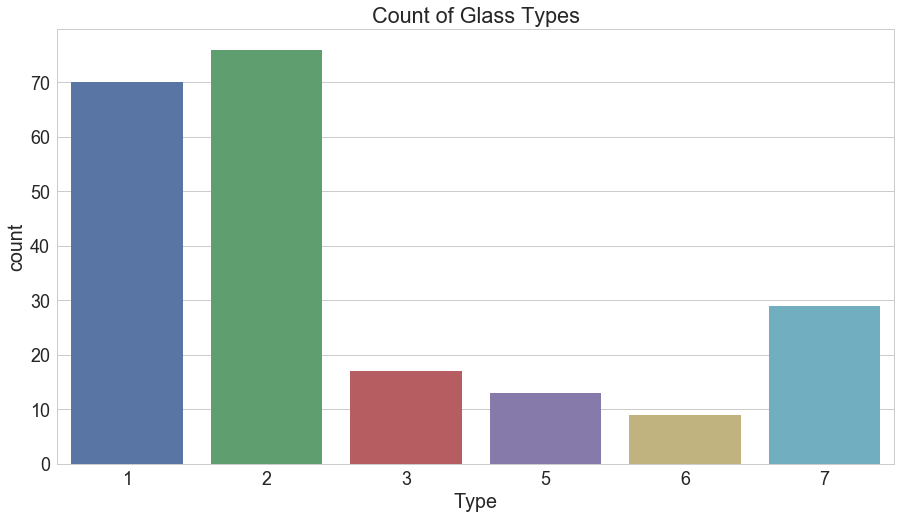

In [80]:
sns.set(style="whitegrid", font_scale=1.8)
plt.subplots(figsize = (15,8))
sns.countplot('Type',data=glass_df).set_title('Count of Glass Types')

We see that Type 2 and 1 have the highest occurences in the dataset, so we need to make sure that the train and test dataset have a good representation from all the types. The dataset source is forensic sciences department and probably the reason of the high count of type 1 & 2 is that many criminals break through building window glasses at the scene rather than breaking containers or tableware.

In [81]:
# Checked both mean and median. mean seemed more informative
glass_df.groupby('Type', as_index=False).mean()

,Type,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,1.518718,13.242286,3.552429,1.163857,72.619143,0.447429,8.797286,0.012714,0.057000
1,2,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
2,3,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
3,5,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
4,6,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
5,7,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


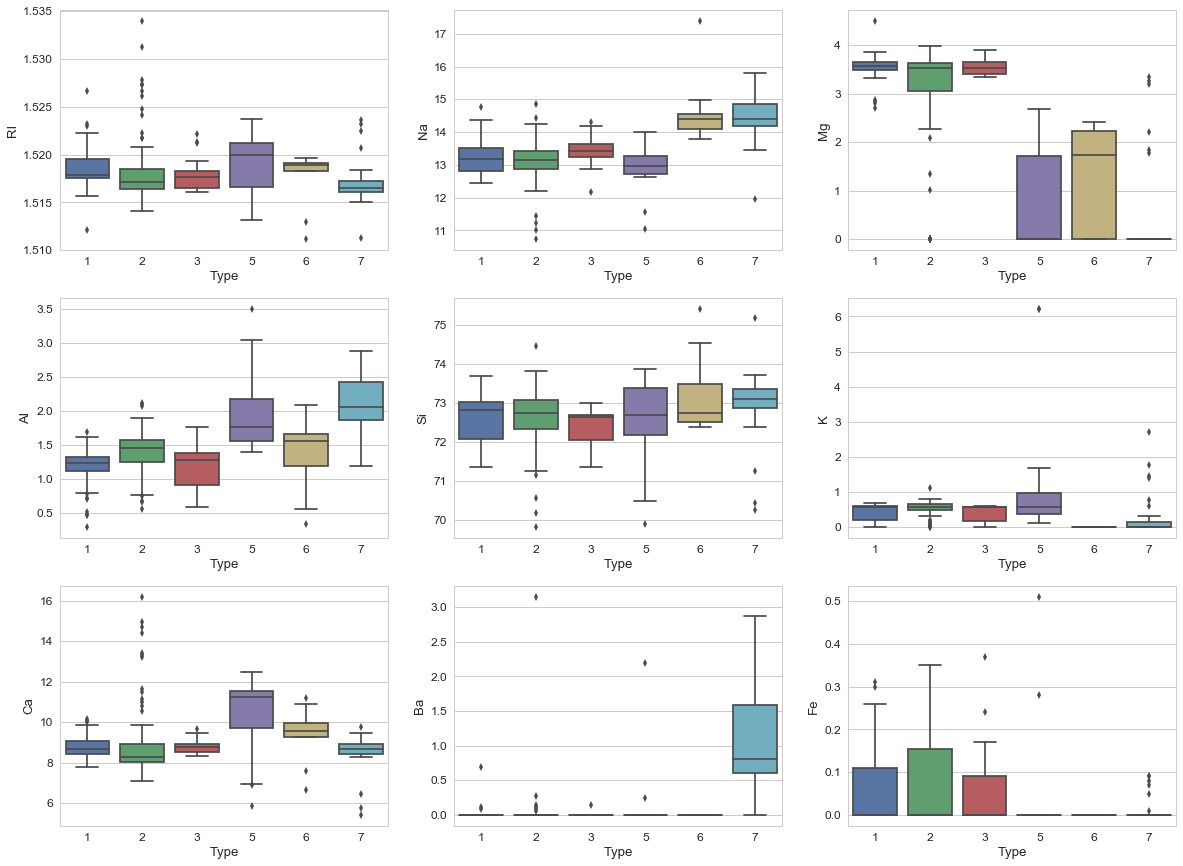

In [82]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Type', y='RI', data=glass_df)
plt.subplot(3,3,2)
sns.boxplot(x='Type', y='Na', data=glass_df)
plt.subplot(3,3,3)
sns.boxplot(x='Type', y='Mg', data=glass_df)
plt.subplot(3,3,4)
sns.boxplot(x='Type', y='Al', data=glass_df)
plt.subplot(3,3,5)
sns.boxplot(x='Type', y='Si', data=glass_df)
plt.subplot(3,3,6)
sns.boxplot(x='Type', y='K', data=glass_df)
plt.subplot(3,3,7)
sns.boxplot(x='Type', y='Ca', data=glass_df)
plt.subplot(3,3,8)
sns.boxplot(x='Type', y='Ba', data=glass_df)
plt.subplot(3,3,9)
sns.boxplot(x='Type', y='Fe', data=glass_df)
plt.show()

The box plot shows that average Refractive index is similar for all types. Although, Type 5 has a wider range and slightly higher mean. Sodium content is higher in Type 6 & 7, whereas Magnesium content is fairly high in Type 1, 2 & 3. Aluminium is higher in type 5 & 7. Silica does not provide much information to differentiate as it has the highest concentration amongst all the minerals but has similar range for all types. Potassium also doesn't provide much insight. But it's higher in type 5, containers, because K is used in toughened glass which are used to make pyrex items. Calcium is highest in type 5 and Barium in type 7. Iron is present in extremely low concentration, yet type 1, 2 & 3 have high values for some glasses than the rest. This is because Iron is added mainly in colored glasses.

We got some idea on which feature provides more insight in differentiating one type from another. Now, let's see the relationship between each one of them through a pairplot. (We will leave out K, Ba and Fe due to sparse concentration)

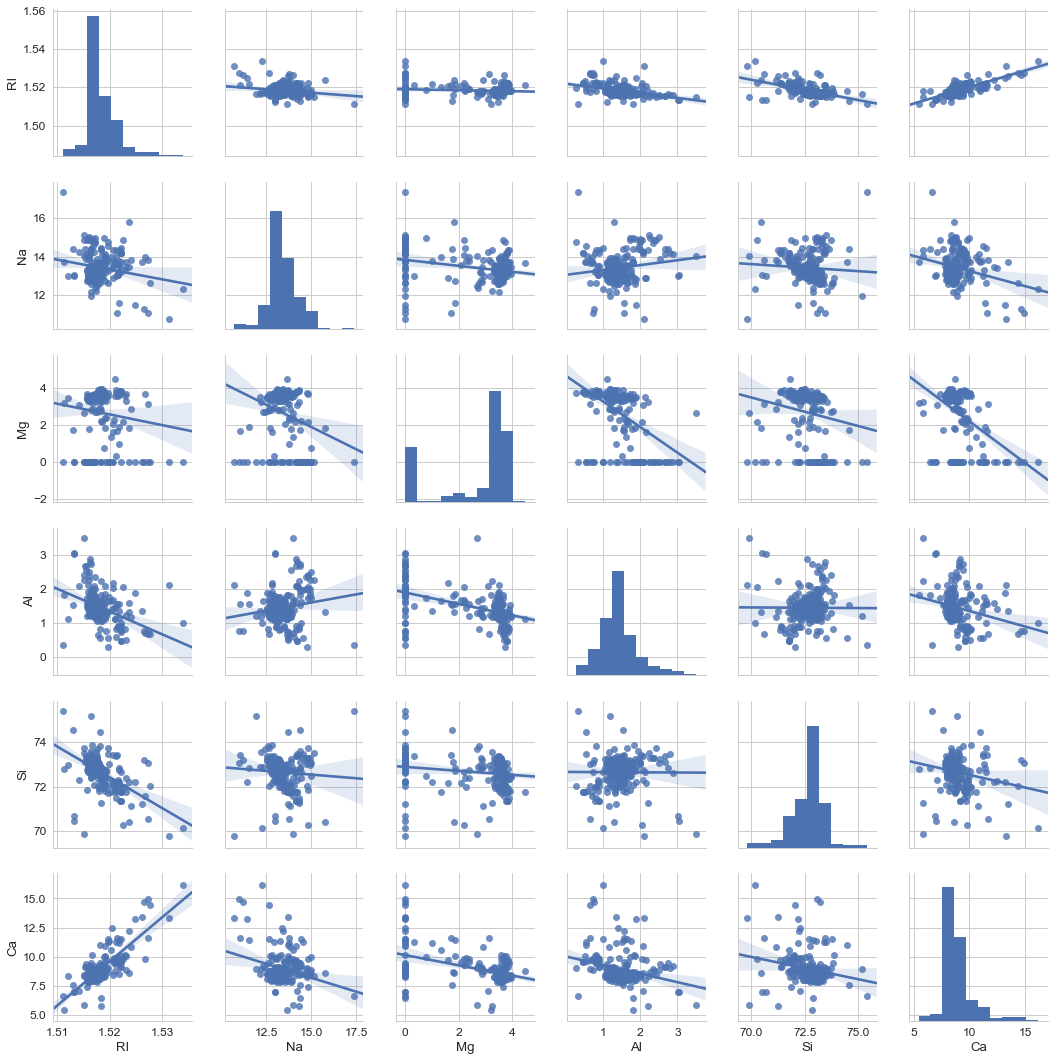

In [83]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
sns.pairplot(glass_df[['RI','Na','Mg','Al','Si','Ca']], kind='reg')

On most dimensions, the points are scattered. But we can clearly see some strong relationship between Calcium and Refractive index. Silica and RI seem to have an inverse relationship. 

Type 1,2 & 3 have very similar properties. However, we can distinguish them based on whether they are flat or not. Basically, float process is used to flatten the glass into sheets. Let us see the density plot of flat vs non-flat glass on some of the properties.

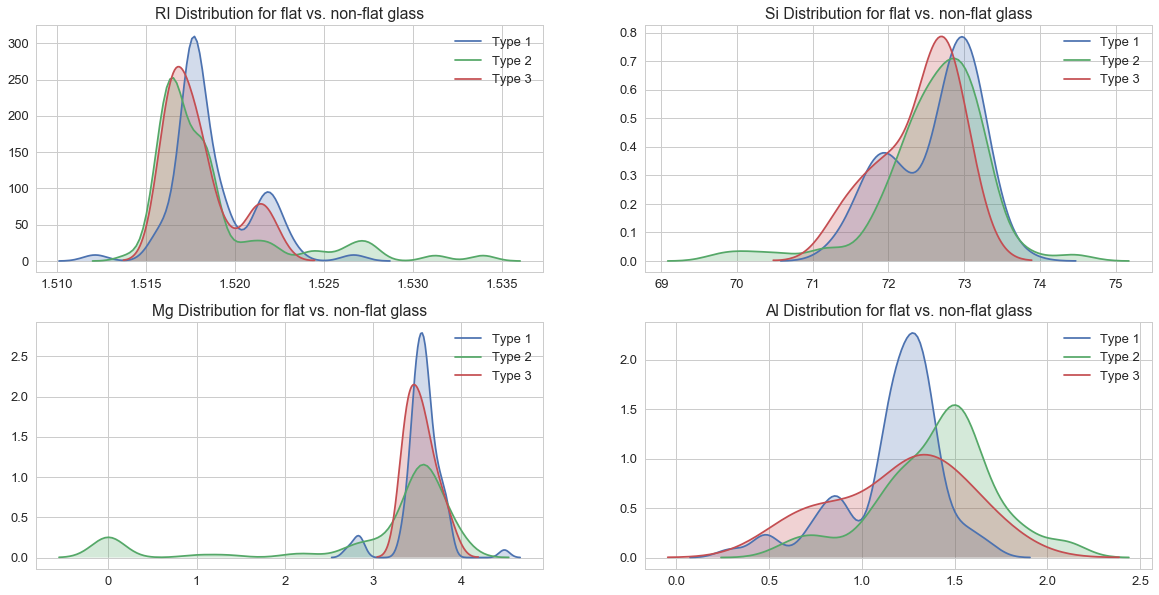

In [84]:
sns.set(style="whitegrid", font_scale=1.3)
plt.subplots(figsize = (20,10))
plt.subplot(2,2,1)
sns.kdeplot(glass_df["RI"][glass_df.Type == 1], shade = True)
sns.kdeplot(glass_df["RI"][glass_df.Type == 2], shade = True)
sns.kdeplot(glass_df["RI"][glass_df.Type == 3], shade = True)
plt.title("RI Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,2)
sns.kdeplot(glass_df["Si"][glass_df.Type == 1], shade = True)
sns.kdeplot(glass_df["Si"][glass_df.Type == 2], shade = True)
sns.kdeplot(glass_df["Si"][glass_df.Type == 3], shade = True)
plt.title("Si Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,3)
sns.kdeplot(glass_df["Mg"][glass_df.Type == 1], shade = True)
sns.kdeplot(glass_df["Mg"][glass_df.Type == 2], shade = True)
sns.kdeplot(glass_df["Mg"][glass_df.Type == 3], shade = True)
plt.title("Mg Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,4)
sns.kdeplot(glass_df["Al"][glass_df.Type == 1], shade = True)
sns.kdeplot(glass_df["Al"][glass_df.Type == 2], shade = True)
sns.kdeplot(glass_df["Al"][glass_df.Type == 3], shade = True)
plt.title("Al Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])

Mostly the flat ones (1,3) overlap on all the properties except Aluminium. Aluminium has a wider range for type 3 than type 1. The non-float glass, type 2 has many extreme points which make its range very high. 

## Feature Selection using PCA

Let us plot a correlation heatmap to identify multicollinearity

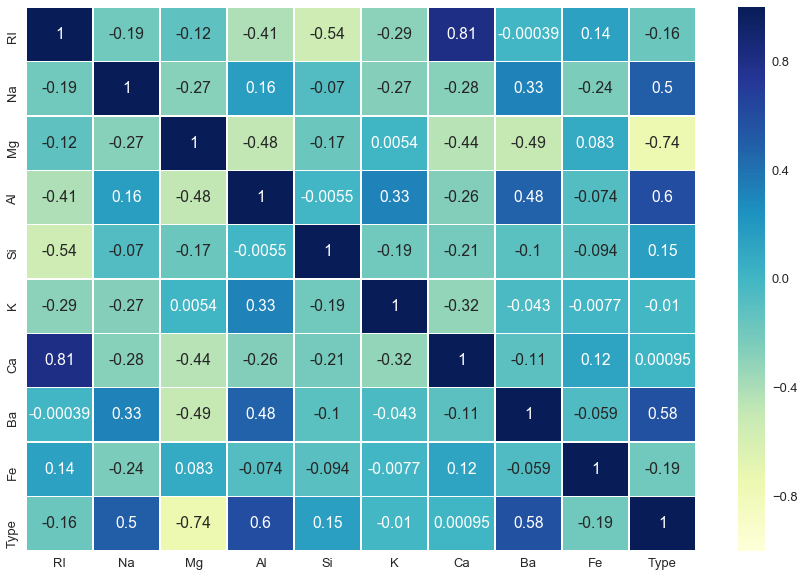

In [85]:
plt.subplots(figsize=(15,10))
sns.heatmap(glass_df.corr(),cmap='YlGnBu',annot=True, linewidth=.5)

As seen in the pairplot, RI and Ca have a high positive correlation, and Si and RI, negative. But since this is a classification technique and not regression, we cannot simply remove the collinear variables from the model, as they might be able to explain the difference between the target labels. 

Let us look at a powerful method called Principal component analysis to decide on the candidate variables. This is valuable as it can help in dimension reduction and lower the cost of data collection.

                      P1    P2    P3    P4    P5   P6    P7   P8   P9
Explained_Variance  2.99  1.65  0.68  0.64  0.21  0.1  0.01  0.0  0.0


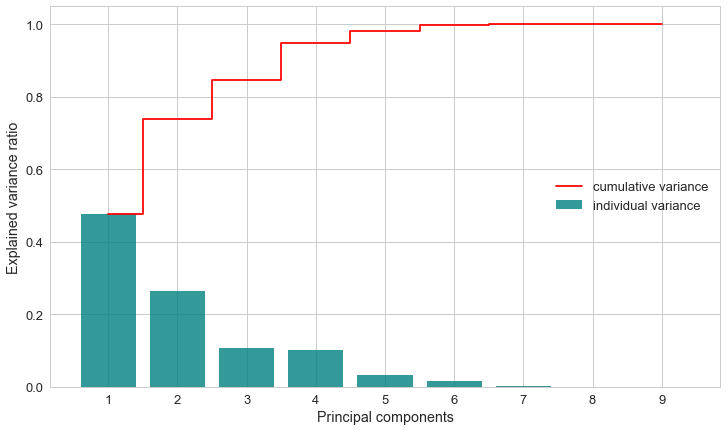

In [86]:
# Performing PCA
X_var = glass_df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
pca = PCA(random_state = 1)
pca.fit(X_var)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
var_df = pd.DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,10)],
                      columns=["Explained_Variance"])
print(var_df.T)
plt.figure(figsize=(12,7))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance', color='teal', alpha = 0.8)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

The first 5 components account for about 99% of the total explained variance. We can run the analysis again only with these five components.

In [87]:
pca_red = PCA(n_components=5)
X_reduced = pca_red.fit_transform(X_var)

Now that we have our features and target labels, let us proceed to model development.

## Model Development

In [88]:
# Separating the response (y) and explanatory (x) variables
X = X_reduced
y = glass_df["Type"].values

In [89]:
# Splitting the dataset into test and training with 70% for training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

# Check whether the train and test have instances of all the glass types
print(np.unique(y_train))
print(np.unique(y_test))

[1 2 3 5 6 7]
[1 2 3 5 6 7]


### Testing Candidate models

In [90]:
# Support Vector Machines
svmMod = SVC()
svmMod.fit(X_train,y_train)
y_pred = svmMod.predict(X_test)
sc1 = metrics.accuracy_score(y_pred,y_test)

# XGBoost CLassifier
xgbMod = XGBClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
xgbMod.fit(X_train,y_train)
y_pred = xgbMod.predict(X_test)
sc2 = metrics.accuracy_score(y_pred,y_test)

# Gradient Boost Classifier
gbmMod = GradientBoostingClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
gbmMod.fit(X_train,y_train)
y_pred = gbmMod.predict(X_test)
sc3 = metrics.accuracy_score(y_pred,y_test)

# Decision Tree
DecTree = tree.DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
y_pred = DecTree.predict(X_test)
sc4 = metrics.accuracy_score(y_pred,y_test)

# Random Forest
RandFor = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 50, random_state = 1)
RandFor.fit(X_train, y_train)
y_pred = RandFor.predict(X_test)
sc5 = metrics.accuracy_score(y_pred,y_test)

In [91]:
print(DecTree.feature_importances_)
print(RandFor.feature_importances_)
print(xgbMod.feature_importances_)
print(gbmMod.feature_importances_)

[ 0.20104206  0.29185892  0.21157046  0.22609408  0.06943448]
[ 0.31377335  0.32296928  0.05489302  0.21178263  0.09658172]
[ 0.31419197  0.18908942  0.14684168  0.21369976  0.1361772 ]
[ 0.30483445  0.28651912  0.14397123  0.19147754  0.07319767]


In [92]:
# Compare accuracy of models
pd.DataFrame([['Support Vector Machine',sc1],['XG Boost',sc2],['Gradient Boost',sc3],
                             ['Decision Tree',sc4],['Random Forest',sc5]],
                                 columns=['Model','Accuracy'])

,Model,Accuracy
0,Support Vector Machine,0.753846
1,XG Boost,0.692308
2,Gradient Boost,0.692308
3,Decision Tree,0.661538
4,Random Forest,0.738462


SVM gives the highest accuracy and all the features seem to be important from the other models. So, we will retain SVM as our final model and perform hyperparameter tuning to improve it.

### Hyperparameter tuning

In [93]:
tuned_parameters = [{'kernel': ['rbf','linear'], 'gamma': [0.001, 0.01, 0.1, 10],
                     'C': [0.001, 0.01, 0.1, 1, 10]}]
grid = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(grid.best_params_)

Best parameters set found on development set:

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


### Running final model

In [94]:
model = grid.best_estimator_
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_pred,y_test)

0.80000000000000004

### Model Performance

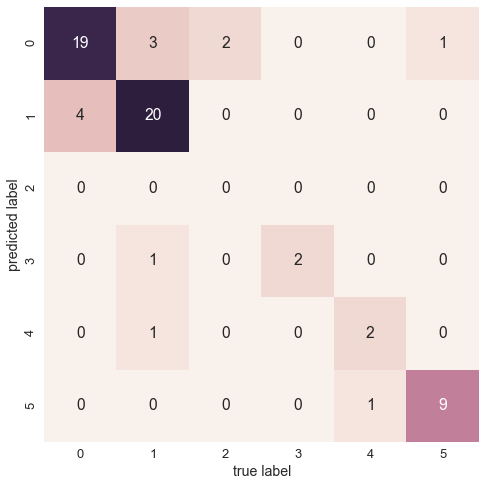

In [95]:
# Let's plot the confusion matrix
mat = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(12,8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [96]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          1       0.76      0.83      0.79        23
          2       0.83      0.80      0.82        25
          3       0.00      0.00      0.00         2
          5       0.67      1.00      0.80         2
          6       0.67      0.67      0.67         3
          7       0.90      0.90      0.90        10

avg / total       0.78      0.80      0.79        65



## Conclusion

We see that overall model identifies most of the glass types correctly - type 1,2, 5 and 7, but not the rest. It could be due to the dataset being unbalanced in number of instances of each type. There is also some confusion among type 1, 2 and 3 which we had sensed while performing the EDA.

Learnings:
- nbextensions, slideshow in Jupyter Notebook
- Dimensionality reduction using PCA
- Hyperparamenter tuning using GridSearch
- Benefits of Glass identification! :)

Some Trade-off's: 
- PCA dimensionality reduction resulted in slightly lower model scores. 
- Grid Search increased the accuracy by fine tuning the parameters but it is computationally expensive.

## Reference

- https://archive.ics.uci.edu/ml/datasets/glass+identification
- http://www.davidpublisher.com/Public/uploads/Contribute/56f9de9b67f83.pdf
- https://www.researchgate.net/publication/228451484_Classification_and_Regression_by_RandomForest
- https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
- Sebastian Raschka, "Python Machine Learning", Chapter 3, A Tour of Machine Learning Classifiers Using Scikit-Learn

# THANK YOU!